In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random

# atividade 01
Escreva um algoritmo que faça a segmentação de imagens, ou de uma imagem de entrada, baseada em regiões


In [2]:
image_path = "/content/image.jpg"

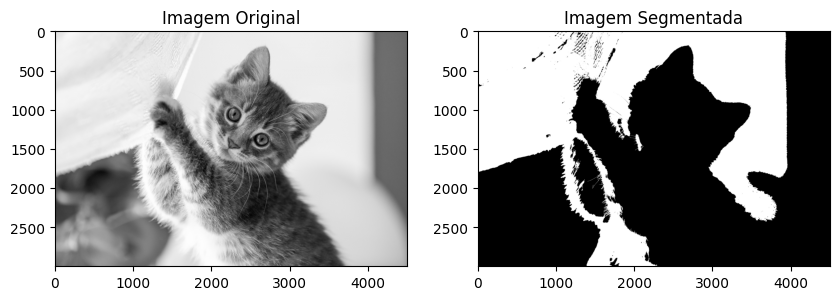

In [3]:
def region_growing(image, seed, threshold):
    segmented = np.zeros_like(image, dtype=np.uint8)

    pixels_to_check = [seed]

    seed_intensity = image[seed]

    while pixels_to_check:
        x, y = pixels_to_check.pop()

        if segmented[x, y] == 255:
            continue

        if abs(int(image[x, y]) - int(seed_intensity)) <= threshold:
            segmented[x, y] = 255

            if x > 0: pixels_to_check.append((x - 1, y))
            if x < image.shape[0] - 1: pixels_to_check.append((x + 1, y))
            if y > 0: pixels_to_check.append((x, y - 1))
            if y < image.shape[1] - 1: pixels_to_check.append((x, y + 1))

    return segmented

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

seed = (100, 100)
threshold = 20

segmented_image = region_growing(image, seed, threshold)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagem Segmentada')
plt.show()

# atividade 02

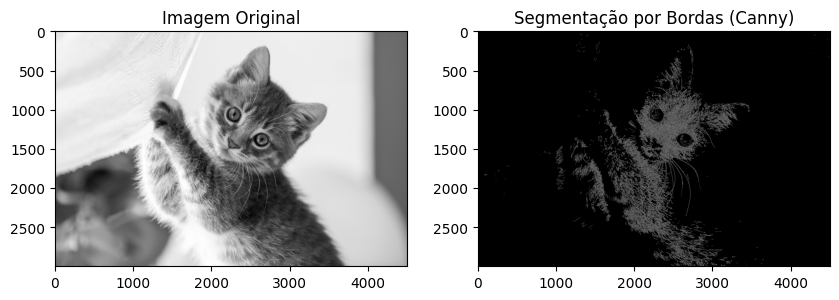

In [4]:
def edge_based_segmentation(image, low_threshold, high_threshold):
    edges = cv2.Canny(image, low_threshold, high_threshold)

    return edges

image1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

low_threshold = 50
high_threshold = 150

edge_segmented_image = edge_based_segmentation(image1, low_threshold, high_threshold)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(edge_segmented_image, cmap='gray')
plt.title('Segmentação por Bordas (Canny)')
plt.show()

# atividade 03

In [6]:
def generate_image(image_size=(100, 100)):
    image = np.ones(image_size, dtype=np.uint8) * 255

    shape_type = random.choice(['circle', 'rectangle'])
    color = random.randint(100, 255)

    if shape_type == 'circle':
        center = (random.randint(20, image_size[0] - 20), random.randint(20, image_size[1] - 20))
        radius = random.randint(10, 30)
        cv2.circle(image, center, radius, color, -1)
    else:
        top_left = (random.randint(10, image_size[0] - 40), random.randint(10, image_size[1] - 40))
        bottom_right = (top_left[0] + random.randint(20, 40), top_left[1] + random.randint(20, 40))
        cv2.rectangle(image, top_left, bottom_right, color, -1)

    noise = np.random.randint(0, 30, image_size, dtype=np.uint8)
    noisy_image = cv2.add(image, noise)

    return noisy_image

def generate_dataset(num_images=200, image_size=(100, 100), dataset_path='./dataset'):
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)

    for i in range(num_images):
        image2 = generate_image(image_size)
        image_path = os.path.join(dataset_path, f'image_{i+1}.png')
        cv2.imwrite(image_path, image2)

generate_dataset()